# Imports

In [1]:
import numpy as np

# import sys
# sys.path.append("/path/to/aux_classifier")
import aux_classifier.extraction as extraction
import aux_classifier.data_loader as data_loader
import aux_classifier.utils as utils


import matplotlib.pyplot as plt

def plot_neurons_per_layer(toplayers, title, numberlayers=13, layersize = 768):
    nlayers = np.floor_divide(toplayers,layersize)
    (unique, counts) = np.unique(nlayers, return_counts=True)
    layersLabels = np.arange(numberlayers)
    layersCounts = np.zeros(numberlayers)
    for i in range(len(unique)):
        layersCounts[unique[i]]=counts[i]
    plt.bar(layersLabels, layersCounts, align='center', alpha=0.5)
    plt.xticks(layersLabels)
    plt.ylabel('Counts')
    plt.title(title)

    plt.show()

# Data

In [ ]:
!cat examples/test.ar

In [ ]:
!cat examples/test.ar.label

# Extract Representations

Models to upload:
* [QARiB](https://huggingface.co/qarib/bert-base-qarib) ```'qarib/bert-base-qarib'```
* [AraBERT](https://huggingface.co/aubmindlab/bert-base-arabert) ```'aubmindlab/bert-base-arabert'```
* [ArabicBERT](https://huggingface.co/asafaya/bert-base-arabic) ```'asafaya/bert-base-arabic'```
* [mBERT](https://huggingface.co/bert-base-multilingual-cased) ```'bert-base-multilingual-cased'```

1.  QARiB

In [ ]:

extraction.extract_representations('qarib/bert-base-qarib',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.qarib_activations.json',
                                   aggregation="average"
                                  )

2. AraBERT

In [ ]:
extraction.extract_representations('aubmindlab/bert-base-arabert',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabert_activations.json',
                                   aggregation="average"
                                  )

3. ArabicBERT

In [ ]:

extraction.extract_representations('asafaya/bert-base-arabic',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json',
                                   aggregation="average"
                                  )

4. mBERT

In [ ]:
extraction.extract_representations('bert-base-multilingual-cased',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json',
                                   aggregation="average"
                                  )

In [ ]:
!cut -c1-100 < examples/activations.json

# Prepare Data

In [ ]:
# Loading QARiB
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.qarib_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

In [ ]:
# Loading araBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

In [ ]:
# Loading arabicBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

In [2]:
# Loading mBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

Loading json activations from /QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json...
399 13.0


In [ ]:
#activations

In [ ]:
activations[1].shape

In [3]:
tokens = data_loader.load_data('/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                               '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.POS',
                               activations,
                               512
                              )

Ignored one line 338 line: ['بعد', 'شهر', 'على', 'رحيل', 'المغني', 'الأميركي', 'مايكل', 'جاكسون', 'لا', 'تزال', 'الإشاعات', 'والتكهنات', 'تتناول', 'أسباب', 'وفاته', 'ومصير', 'جثمانه', 'اللذين', 'يبقيان', 'لغزا', '،', 'بالإضافة', 'إلى', 'مستقبل', 'أملاكه', 'ومصير', 'أولاده', '،', 'فيما', 'تتزايد', 'نظريات', 'المؤامرة', '.', 'والتحقيق', 'في', 'وفاة', 'ملك', 'البوب', 'عن', 'خمسين', 'عاما', 'في', '25', 'يونيو', 'في', 'منزله', '،', 'الذي', 'كان', 'يستأجره', 'في', 'لوس', 'أنجلوس', '،', 'تقدم', 'بعض', 'الشيء', 'مع', 'ظهور', 'كلمة', '"', 'جريمة', 'قتل', '"', 'للمرة', 'الأولى', 'الأربعاء', '،', 'من', 'قبل', 'شخص', 'ضالع', 'مباشرة', 'في', 'القضية', '،', 'رغم', 'أن', 'العديد', 'من', 'المصادر', 'غير', 'الرسمية', 'أكدت', 'أن', 'شرطة', 'لوس', 'أنجلوس', 'قررت', 'معالجة', 'التحقيقات', 'باعتبار', 'القضية', '"', 'إجرامية', '"', '.', 'وزادت', 'الشبهات', 'حول', 'طبيبه', 'كونراد', 'موراي', 'الذي', 'كان', 'متواجدا', 'مع', 'مايكل', 'جاكسون', 'عند', 'وفاته', 'والذي', 'داهمت', 'الشرطة', 'أحد', 'مكاتبه', '.', '

In [4]:
tokens['source'][:2]

[['#', 'ثقافة'],
 ['فيلم',
  'جاذبية',
  'يتصدر',
  'ترشيحات',
  'جوائز',
  'الأكاديمية',
  'البريطانية',
  'لفنون',
  'الفيلم',
  'والتلفزيون']]

In [5]:
X, y, mapping = utils.create_tensors(tokens, activations, 'LABEL1')
label2idx, idx2label, src2idx, idx2src = mapping

Number of tokens:  17758
length of source dictionary:  6655
length of target dictionary:  110
17758
Total instances: 17758
['وأغسطس', 'بحضور', 'الإلكترونية', 'للعمل', 'كمثل', 'رأيها', 'man', 'والمشاكل', 'وعمله', 'وحذرت', 'نعرف', 'جديد', 'مقتل', 'والبريد', 'أمير', 'أسماء', 'وتحليلها', 'التمهيدية', 'يترنح', 'يعادل']


# Train Probing Classifier

In [6]:
model = utils.train_logreg_model(X, y, lambda_l1=0.001, lambda_l2=0.001)

Training classification model
Creating model...
Number of training instances: 17758
Number of classes: 110



Epoch: [1/10], Loss: 0.1012



Epoch: [2/10], Loss: 0.0922



Epoch: [3/10], Loss: 0.0905



Epoch: [4/10], Loss: 0.0902



Epoch: [5/10], Loss: 0.0901



Epoch: [6/10], Loss: 0.0900



Epoch: [7/10], Loss: 0.0899



Epoch: [8/10], Loss: 0.0897



Epoch: [9/10], Loss: 0.0896



Epoch: [10/10], Loss: 0.0894


# Evaluate Model

In [7]:
utils.evaluate_model(model, X, y, idx_to_class=idx2label)


Score (accuracy) of the model: 0.76


{'__OVERALL__': 0.764387881518189,
 'DET+NOUN+NSUFF+NSUFF': 0.0,
 'PREP+PART': 0.02631578947368421,
 'DET+ADJ+NSUFF+NSUFF': 0.0,
 'PART': 0.8085106382978723,
 'ADJ+NSUFF/NOUN+NSUFF': 0.0,
 'PREP+ADJ': 0.0,
 'DET': 0.25,
 'V': 0.9698660714285714,
 'CONJ+DET+NOUN+NSUFF': 0.0136986301369863,
 'CONJ+DET+NOUN': 0.6454545454545455,
 'FUT_PART+V+PRON': 0.0,
 'CONJ+CONJ': 0.0,
 'V+PRON': 0.41456582633053224,
 'CONJ+FUT_PART+V': 0.0,
 'NOUN+NSUFF+NSUFF': 0.0,
 'CONJ+ADJ/CONJ+NOUN': 0.0,
 'DET+ADJ+NSUFF': 0.9454225352112676,
 'PREP+DET+NOUN': 0.46634615384615385,
 'PREP+DET+ADJ+NSUFF': 0.0,
 'ADJ+NSUFF+NSUFF': 0.0,
 'CONJ+PART': 0.10526315789473684,
 'NUM+CASE': 0.0,
 'ADJ': 0.7534626038781164,
 'CONJ+NUM+NSUFF': 0.2,
 'CONJ+DET+NUM+NSUFF': 0.0,
 'NOUN+NSUFF+PRON': 0.22549019607843138,
 'PRON': 0.7961783439490446,
 'ABBREV': 0.11764705882352941,
 'ADV': 0.0,
 'PREP+PART+PRON': 0.0,
 'NOUN+CASE': 0.24022346368715083,
 'PART/PREP+PART': 0.8,
 'DET+NOUN': 0.8930513595166163,
 'NUM+NSUFF': 0.0930232

# Layerwise probing

In [ ]:
layer_1_X = utils.filter_activations_keep_neurons(np.arange(768, 768*2), X)

In [ ]:
layer_1_X.shape

In [ ]:
model_layer_1 = utils.train_logreg_model(layer_1_X, y, lambda_l1=0.001, lambda_l2=0.001)

In [ ]:
utils.evaluate_model(model_layer_1, layer_1_X, y, idx_to_class=idx2label)

# Get Neuron Ranking

In [8]:
ordering, cutoffs = utils.get_neuron_ordering(model, label2idx)

In [9]:
cutoffs[:10]

[62, 464, 1025, 1734, 2511, 3325, 4151, 4921, 5665, 6364]

In [10]:
len(ordering)

9984

In [ ]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in QARiB POS')

In [ ]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in araBERT POS')

In [ ]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in ArabicBERT POS')

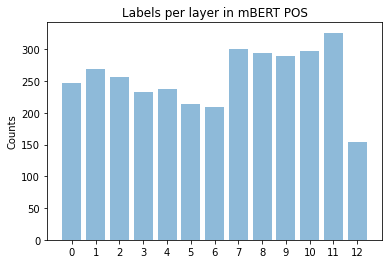

In [11]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in mBERT POS')

# Train on top N neurons

In [ ]:
X_selected = utils.filter_activations_keep_neurons(ordering[:1000], X)

In [ ]:
X_selected.shape

In [ ]:
model_selected = utils.train_logreg_model(X_selected, y, lambda_l1=0.001, lambda_l2=0.001)

In [ ]:
utils.evaluate_model(model_selected, X_selected, y, idx_to_class=idx2label)

# Further analysis

In [12]:
top_neurons = utils.get_top_neurons(model, 0.01, label2idx)

In [13]:
top_neurons

(array([6155, 4111, 2073, 8218, 6174, 6179, 8231, 6183, 2089, 8241, 6210,
        6212, 6218, 2130, 6227, 8278, 8281,   93, 6238, 6243, 2156, 8311,
        6265,  123, 8324, 8325, 8327, 4234, 6283, 2191, 6292, 8342, 8344,
         156,  157, 8353, 8360, 8361, 6318, 6331,  187, 6335, 8384, 4289,
         197, 6345, 6350, 8406, 8414, 6367, 6372,  229, 2276, 6374, 6381,
        2288, 6385, 6397, 6400, 8453, 8457, 8459,  268, 4370,  274, 8481,
        8483, 6439,  298,  301, 6446, 2351, 8497, 6455, 8505,  315, 6464,
        8514, 2377, 6475,  332, 8529,  338, 6486, 4438, 2390, 6498, 8553,
        6508, 6516, 4476, 2432, 6530, 8578, 4486, 2441, 8585, 2443,  399,
        6556, 4522,  426,  429,  430,  441, 8634, 2491, 8633,  448, 8646,
        8654, 6613, 8664,  473, 6619,  480, 8675, 2533, 6631, 6635, 6642,
         510, 6655,  519, 2575, 2577, 2594, 4647, 8744, 8750, 8759, 8760,
        2617, 8772, 6728, 8779, 8786,  596, 6742, 8793, 8794,  605, 4707,
        8805, 8807,  618, 4715, 6763, 

In [14]:
top_neurons[1].keys()

dict_keys(['DET+NOUN+NSUFF+NSUFF', 'PREP+PART', 'DET+ADJ+NSUFF+NSUFF', 'PART', 'ADJ+NSUFF/NOUN+NSUFF', 'PREP+ADJ', 'DET', 'V', 'CONJ+DET+NOUN+NSUFF', 'CONJ+DET+NOUN', 'FUT_PART+V+PRON', 'CONJ+CONJ', 'V+PRON', 'CONJ+FUT_PART+V', 'NOUN+NSUFF+NSUFF', 'CONJ+ADJ/CONJ+NOUN', 'DET+ADJ+NSUFF', 'PREP+DET+NOUN', 'PREP+DET+ADJ+NSUFF', 'ADJ+NSUFF+NSUFF', 'CONJ+PART', 'NUM+CASE', 'ADJ', 'CONJ+NUM+NSUFF', 'CONJ+DET+NUM+NSUFF', 'NOUN+NSUFF+PRON', 'PRON', 'ABBREV', 'ADV', 'PREP+PART+PRON', 'NOUN+CASE', 'PART/PREP+PART', 'DET+NOUN', 'NUM+NSUFF', 'CONJ+ADV', 'CONJ+NOUN', 'FUT_PART', 'DET+NOUN/DET+ADJ', 'CONJ', 'ADJ+CASE', 'PREP+PRON', 'PREP+DET+ADJ', 'DET+NOUN+NSUFF/DET+NUM+NSUFF', 'DET+ADJ/DET+NUM', 'CONJ+PRON', 'ADJ/NUM', 'PREP', 'CONJ+PREP+NOUN+NSUFF+PRON', 'PART+PRON', 'NOUN+PRON', 'CONJ+NUM', 'PART/NOUN', 'DET+ADJ/DET+NOUN', 'PREP+NOUN+PRON', 'CONJ+ADJ+NSUFF', 'DET+ADJ', 'ADV+CASE', 'PREP+PART/CONJ', 'DET+NOUN+NSUFF', 'CONJ+ADJ+PRON', 'PART+PART/PART', 'NOUN+NSUFF', 'NOUN+NSUFF/ADJ+NSUFF', 'PREP+NO

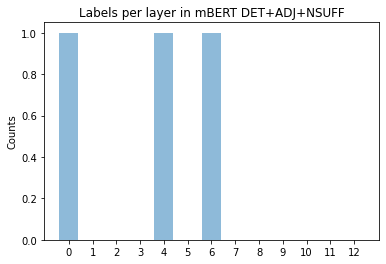

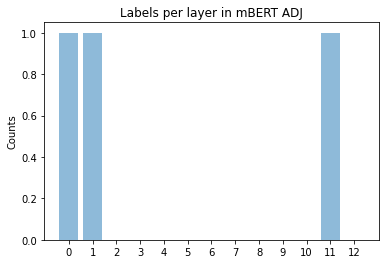

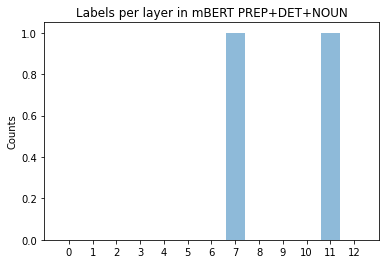

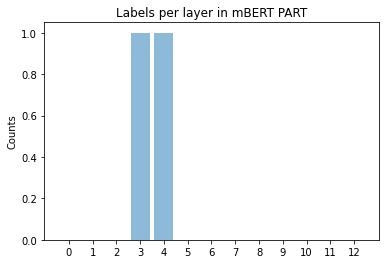

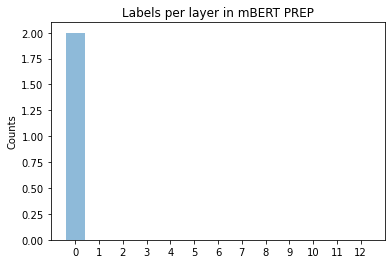

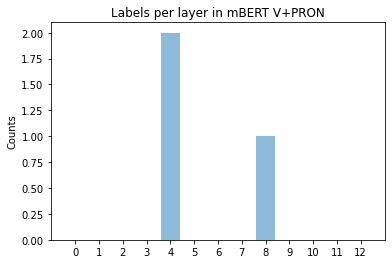

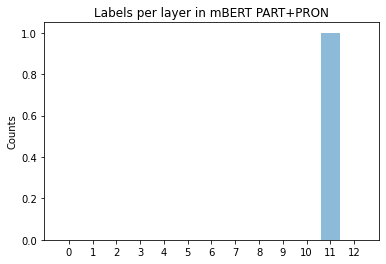

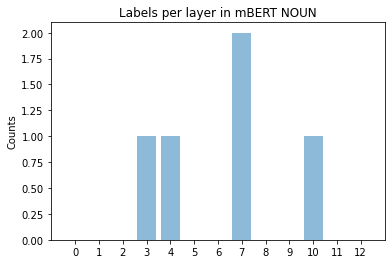

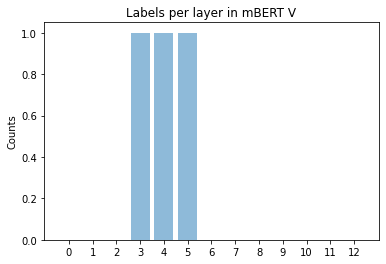

In [16]:
for tag in {'NOUN', 'V', 'PART', 'PREP', 'ADJ', 'PREP+DET+NOUN', 'V+PRON', 'DET+ADJ+NSUFF' , 'PART+PRON' }:
    plot_neurons_per_layer(top_neurons[1][tag],title='Labels per layer in mBERT '+tag)

In [ ]:
plot_neurons_per_layer(top_neurons[1]['DET+NOUN'],title='Labels per layer in QARiB DET+NOUN')

In [ ]:
X_zeroed = utils.zero_out_activations_keep_neurons(ordering[:10], X)
utils.evaluate_model(model, X_zeroed, y, idx_to_class=idx2label)

In [ ]:
activations

In [ ]:
import aux_classifier.visualization as visualization
visualization.visualize_activations("في إجراءات استثنائية بسبب وباء كورونا .", activations[0][:, ordering[0]])

In [ ]:
import svgwrite
FONT_SIZE = 20
MARGIN = 10
CHAR_LIMIT = 61
def break_lines(text, limit=50):
    lines = []
    curr_line = ""
    for token in text.split(' '):
        if len(curr_line) + 1 + len(token) < limit:
            curr_line += token + " "
        else:
            lines.append(curr_line[:-1])
            curr_line = token + " "
    lines.append(curr_line[:-1])
    return lines

def get_rect_style(color, opacity):
    return """opacity:%0.5f;
            fill:%s;
            fill-opacity:1;
            stroke:none;
            stroke-width:0.26499999;
            stroke-linecap:round;
            stroke-linejoin:miter;
            stroke-miterlimit:4;
            stroke-dasharray:none;
            stroke-dashoffset:0;
            stroke-opacity:1""" % (opacity, color)

def get_text_style(font_size):
    return """font-style:normal;
            font-variant:normal;
            font-weight:normal;
            font-stretch:normal;
            font-size:%0.2fpx;
            line-height:125%%;
            font-family:monospace;
            -inkscape-font-specification:'Arial Unicode MS, Normal';
            font-variant-ligatures:none;
            font-variant-caps:normal;
            font-variant-numeric:normal;
            text-align:start;
            writing-mode:lr-tb;
            text-anchor:start;
            stroke-width:0.26458332px""" % (font_size)


In [ ]:
text = 'في إجراءات استثنائية بسبب وباء كورونا .'
lines = break_lines(text, limit=CHAR_LIMIT)
char_width = FONT_SIZE*0.59
char_height = FONT_SIZE*1.25

In [ ]:
lines

In [ ]:
image_height = len(lines) * char_height * 1.2
image_width = CHAR_LIMIT * char_width

dwg = svgwrite.Drawing("tmp.svg", size=(image_width, image_height),
                    profile='full')
dwg.viewbox(0, 0, image_width, image_height)


In [ ]:
darken=2
colors=["#d35f5f", "#00aad4"]
scores = activations[0][:, ordering[0]]
offset = 0

In [ ]:
group = dwg.g()
for _ in range(darken):
    word_idx = 0
    for line_idx, line in enumerate(lines):
        char_idx = 0
        max_score = max(scores)
        min_score = abs(min(scores))
        limit = max(max_score, min_score)
        for word in line.split(' '):
            print('W:',word)
            score = scores[word_idx]
            if score > 0:
                color = colors[1]
                opacity = score/limit
            else:
                color = colors[0]
                opacity = abs(score)/limit

            for _ in word:
                rect_insert = (0 + char_idx * char_width, offset + 7 + line_idx * char_height)
                rect_size = ("%.2fpx"%(char_width), "%0.2fpx"%(char_height))
                group.add(
                    dwg.rect(insert=rect_insert,
                            size=rect_size,
                            style=get_rect_style(color, opacity)
                            )
                )
                char_idx += 1

            final_rect_insert = (0 + char_idx * char_width, offset + 7 + line_idx * char_height)
            final_rect_size = ("%.2fpx"%(char_width), "%0.2fpx"%(char_height))
            group.add(
                dwg.rect(insert=final_rect_insert,
                        size=final_rect_size,
                        style=get_rect_style(color, opacity)
                        )
            )

            char_idx += 1
            word_idx += 1

    for line_idx, line in enumerate(lines):
        text_insert = (0, offset + FONT_SIZE*1.25*(line_idx+1))
        print(text_insert,text)
        text = dwg.text(text,
                        insert=text_insert,
                        fill='black',
                        style=get_text_style(FONT_SIZE))
        group.add(text)
offset += FONT_SIZE*1.25*len(lines) + MARGIN

dwg.add(group)

In [ ]:
dwg